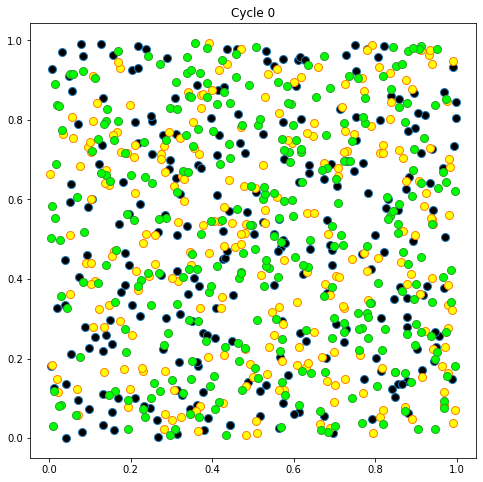

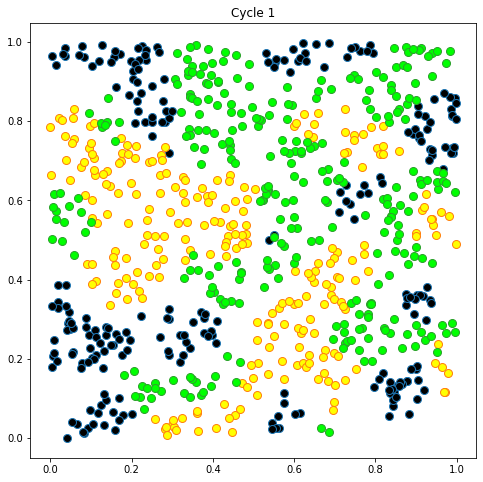

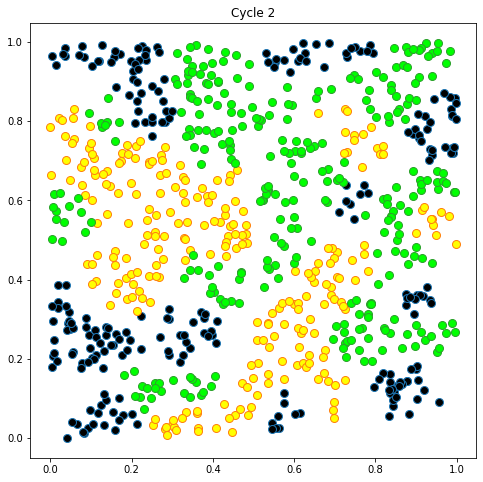

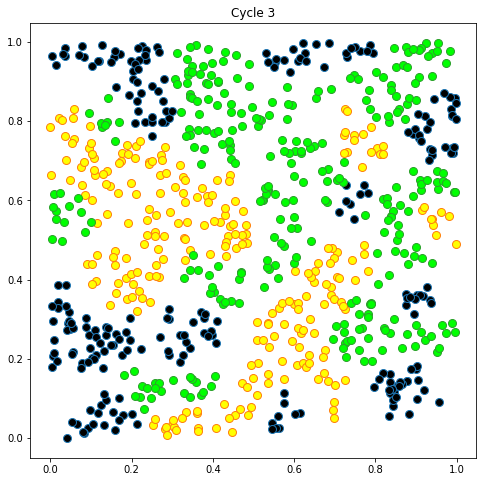

In [4]:
import numpy as np
import random
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)  # For reproducible random numbers

class Agent:

    def __init__(self, type):
        self.type = type
        self.draw_location()

    def draw_location(self):
        self.location = uniform(0, 1), uniform(0, 1)

    def get_distance(self, other):
        "Computes the euclidean distance between self and other agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        "True if sufficient number of nearest neighbors are of the same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()


def plot_distribution(agents, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    x_values_2, y_values_2 = [], []
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        elif agent.type ==1:
            x_values_1.append(x)
            y_values_1.append(y)
        else:
            x_values_2.append(x)
            y_values_2.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='yellow', **plot_args)
    ax.plot(x_values_2, y_values_2, 'o', markerfacecolor='lime', **plot_args)
    ax.set_title(f'Cycle {cycle_num-1}')
    plt.show()

# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_of_type_2 = 300
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))
agents.extend(Agent(2) for i in range(num_of_type_2))

count = 1
# ==  Loop until none wishes to move == #
while True:
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break